## Support Vector Machines

Dataset: Digits dataset - 0-9 - represented as 64 columns (8x8 matrix)

1700+ rows in the data 

Predict what the digit is?

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm, datasets, metrics
from sklearn.model_selection import train_test_split

In [2]:
# Step 1: Load in the data
digits = datasets.load_digits()

In [7]:
print(digits.data[0])
print(digits.target[0])

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
0


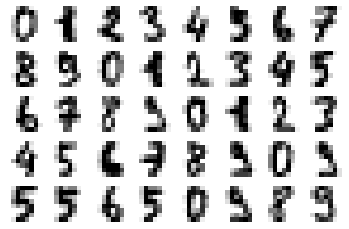

In [6]:
# Look at a few samples of data

for i in range(0,40):
    
    plt.subplot(5,8,i+1)
    plt.axis('off')
    
    imside = 8 # Since i want an 8*8 representation
    
    im1 = np.reshape(digits.data[i], (imside,imside))
    
    # Plot the images
    plt.imshow(im1, cmap = plt.cm.gray_r)

plt.show()

### Step 2: Train test split the model

In [10]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size = 0.2)
# Data is the input, target is the output

### Step 3: Train the model

In [11]:
svm_classifier = svm.SVC()
svm_classifier.fit(X_train, y_train)

SVC()

### Step 4: Predict and Evaluate

In [12]:
y_pred = svm_classifier.predict(X_test)

In [13]:
# Performance Metrics

# Accuracy
test_acc = metrics.accuracy_score(y_test, y_pred)
print("Testing Accuracy = ", test_acc)

Testing Accuracy =  0.9861111111111112


Text(87.0, 0.5, 'Predicted')

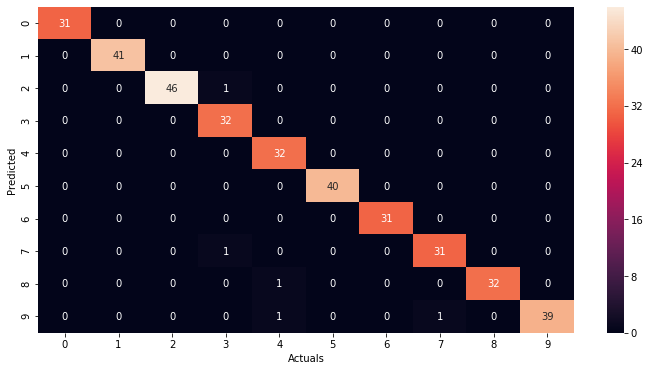

In [16]:
# Confusion Matrix
conf_mat = metrics.confusion_matrix(y_test, y_pred)

import seaborn as sns
plt.figure(figsize=(12,6))
sns.heatmap(conf_mat.T, annot=True)
plt.xlabel("Actuals")
plt.ylabel("Predicted")

In [15]:
conf_mat

array([[31,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 41,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 46,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 32,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0, 32,  0,  0,  0,  1,  1],
       [ 0,  0,  0,  0,  0, 40,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 31,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 31,  0,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 32,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 39]], dtype=int64)

In [18]:
test_pre = metrics.precision_score(y_test, y_pred, average=None)
print("Testing Precision =", test_pre)

Testing Precision = [1.         1.         0.9787234  1.         1.         1.
 1.         0.96875    0.96969697 0.95121951]


In [19]:
test_pre = metrics.recall_score(y_test, y_pred, average=None)
print("Testing Recall =", test_pre)

Testing Recall = [1.         1.         1.         0.94117647 0.94117647 1.
 1.         0.96875    1.         1.        ]
